In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [8]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [9]:
data['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [10]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [11]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [12]:
# Check Duplicate values
data.duplicated().sum()

1103

In [13]:
# Drop Duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [14]:
# Check for missing values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# -------------------------------------------
## Exploratory Data Analysis

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

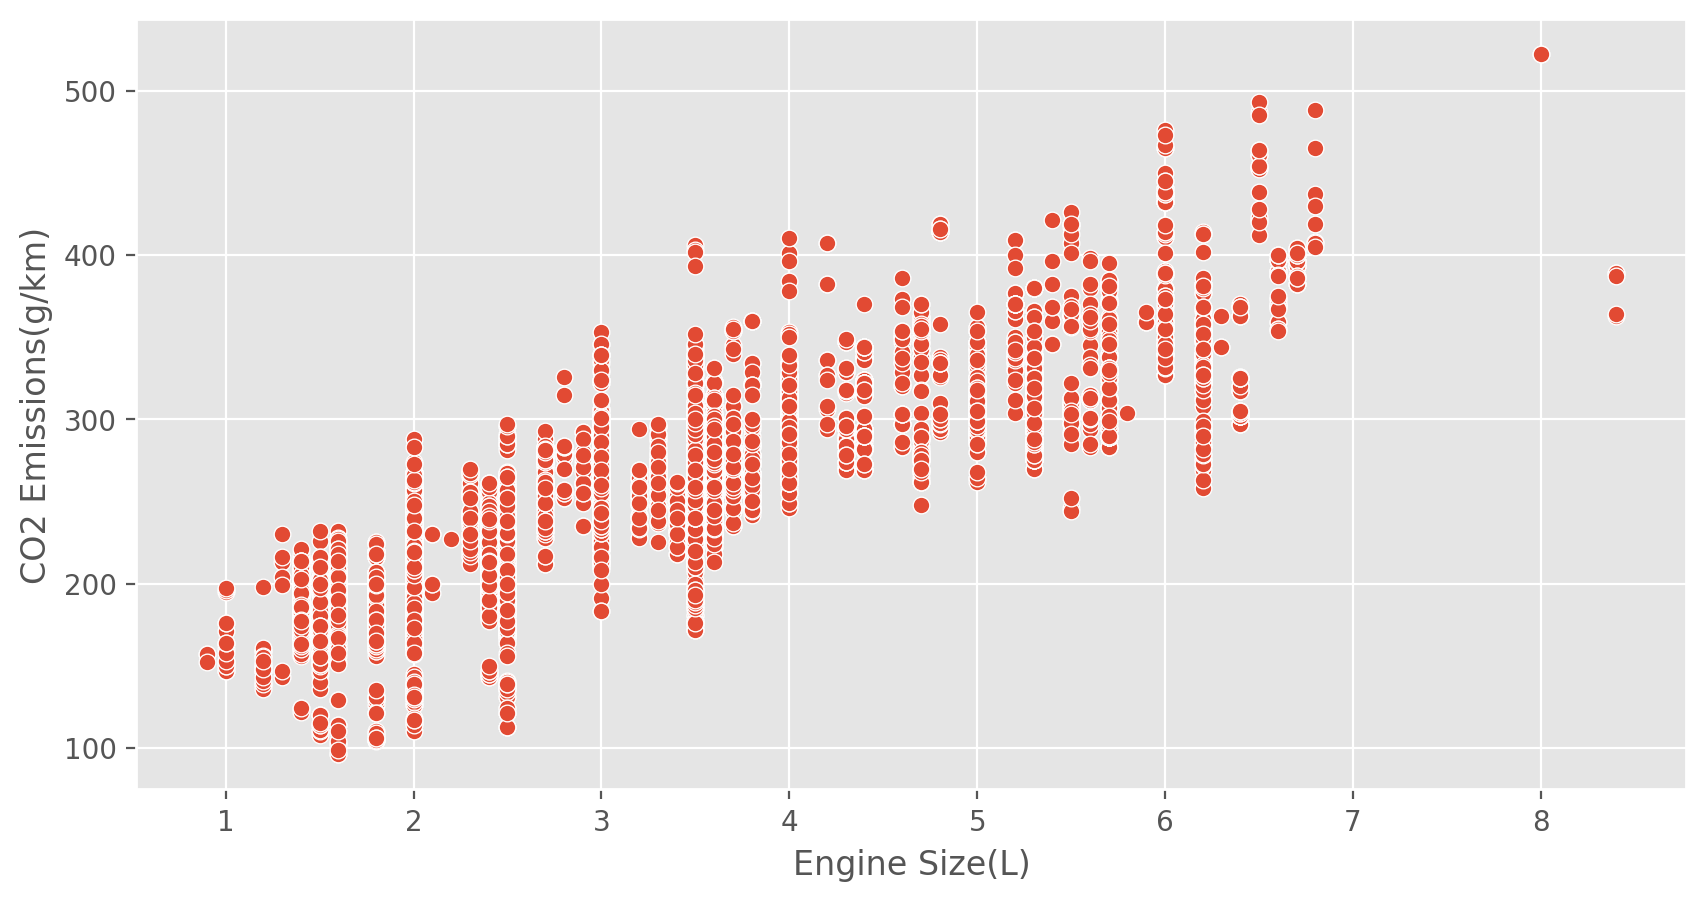

In [15]:
# using engine size for carbon emission- scatterplot
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = data)
# It is a net upward pattern

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

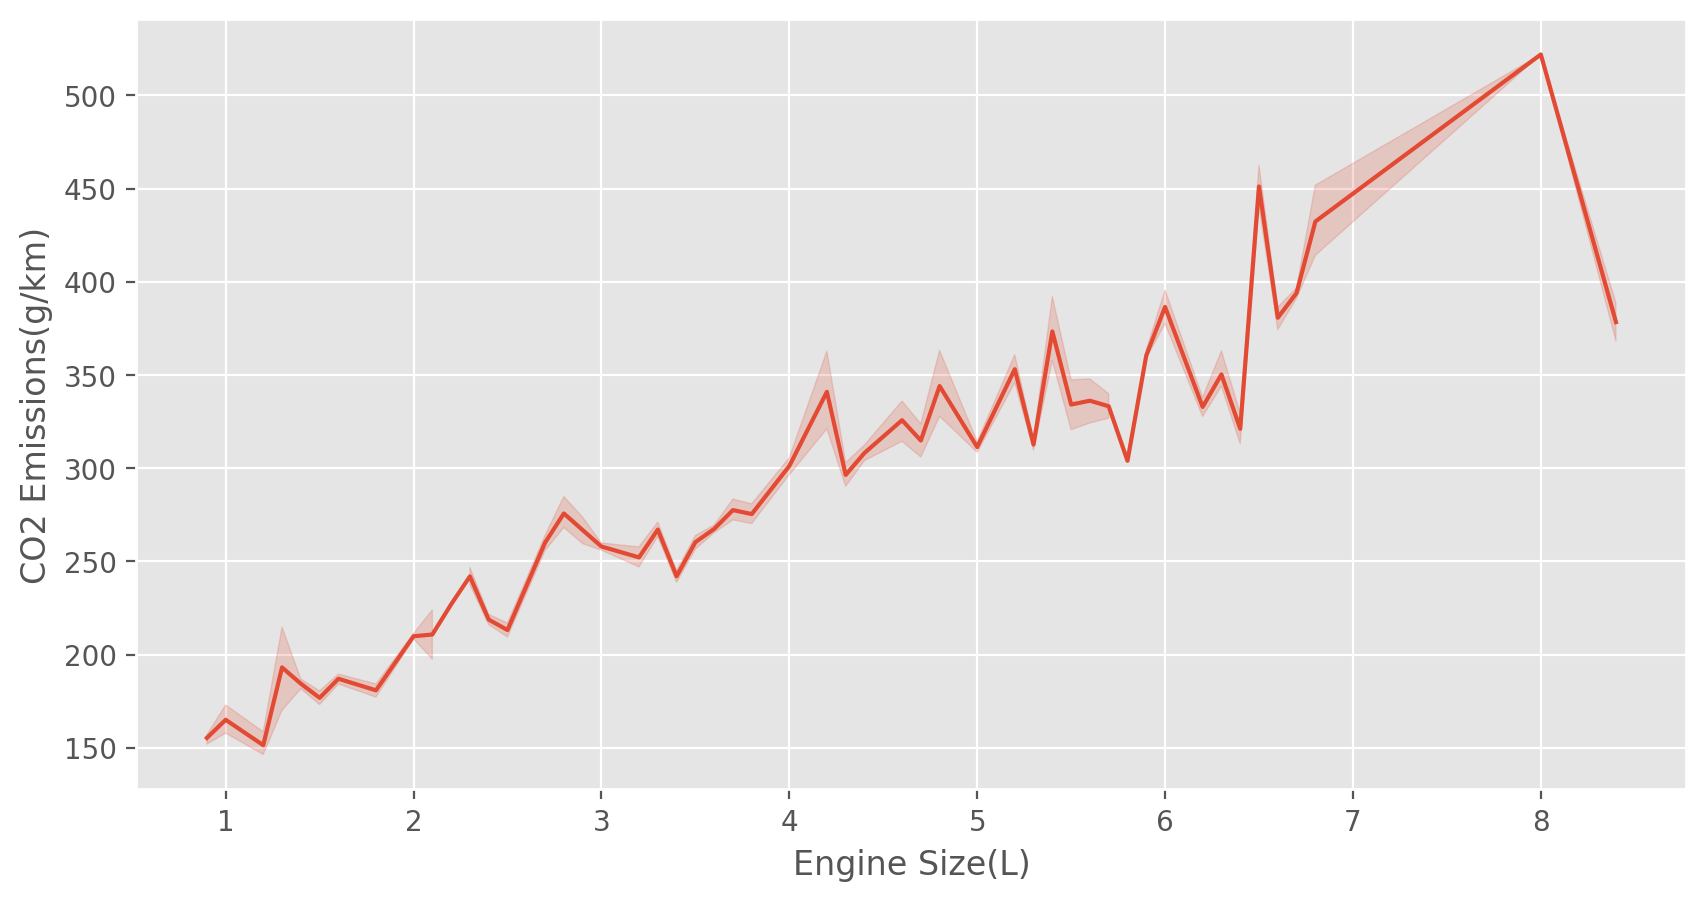

In [16]:
# lineplot 
plt.figure(figsize = (10,5), dpi = 200)
sns.lineplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = data)

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

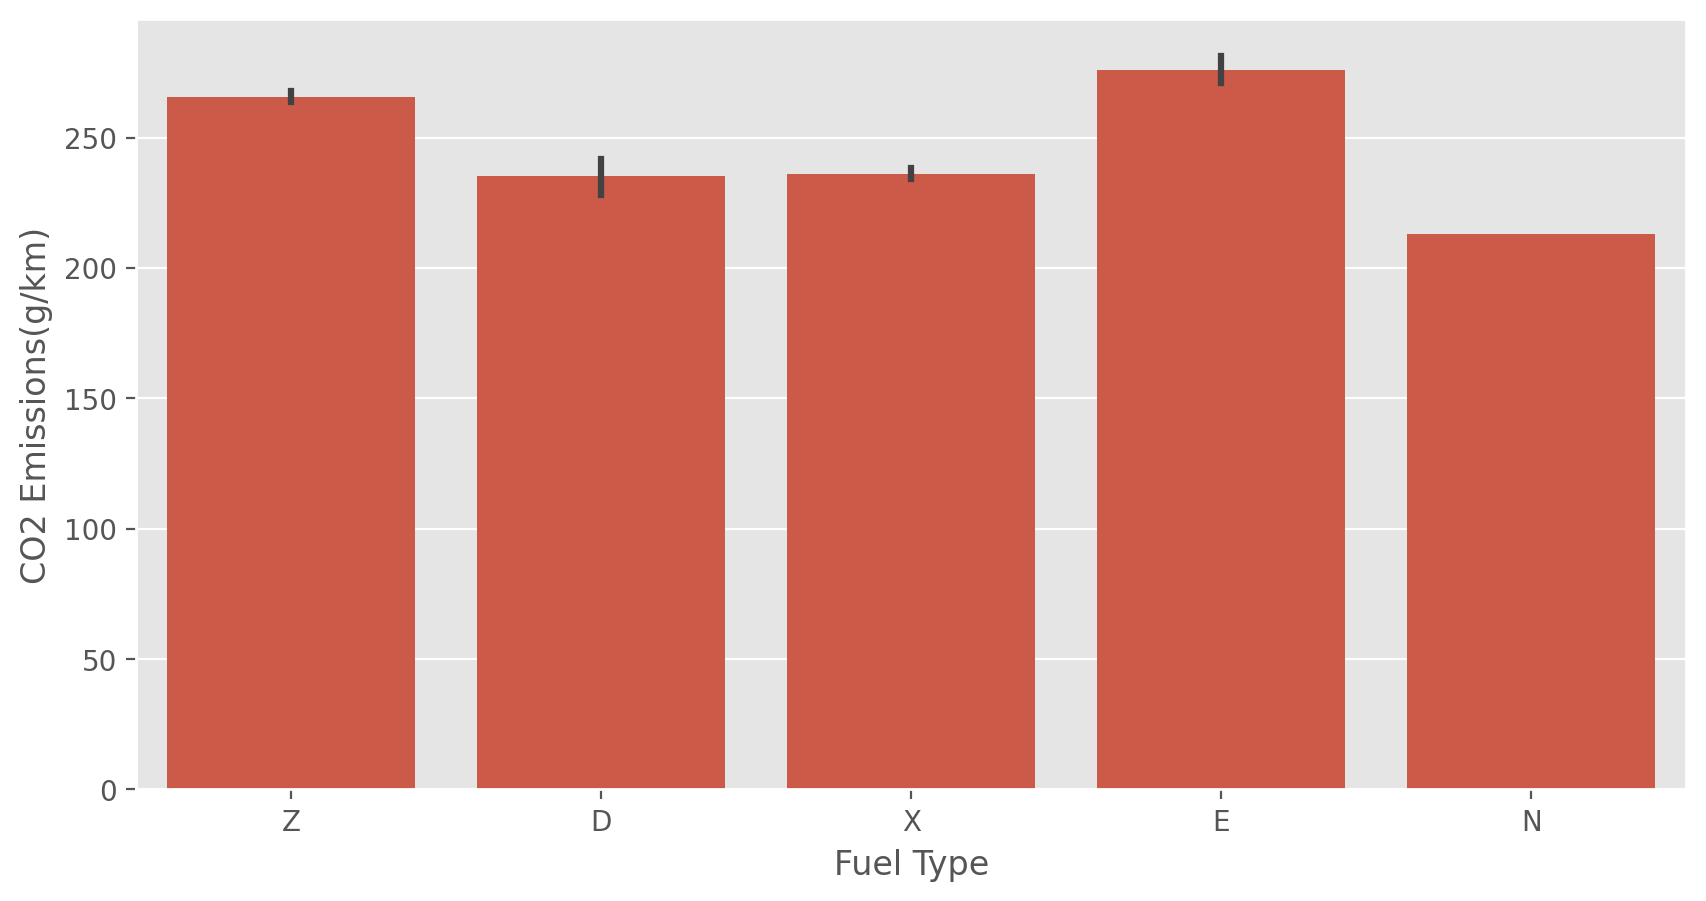

In [17]:
# checking carbon emission wrt fuel type 
plt.figure(figsize = (10,5), dpi = 200)
sns.barplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = data)

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

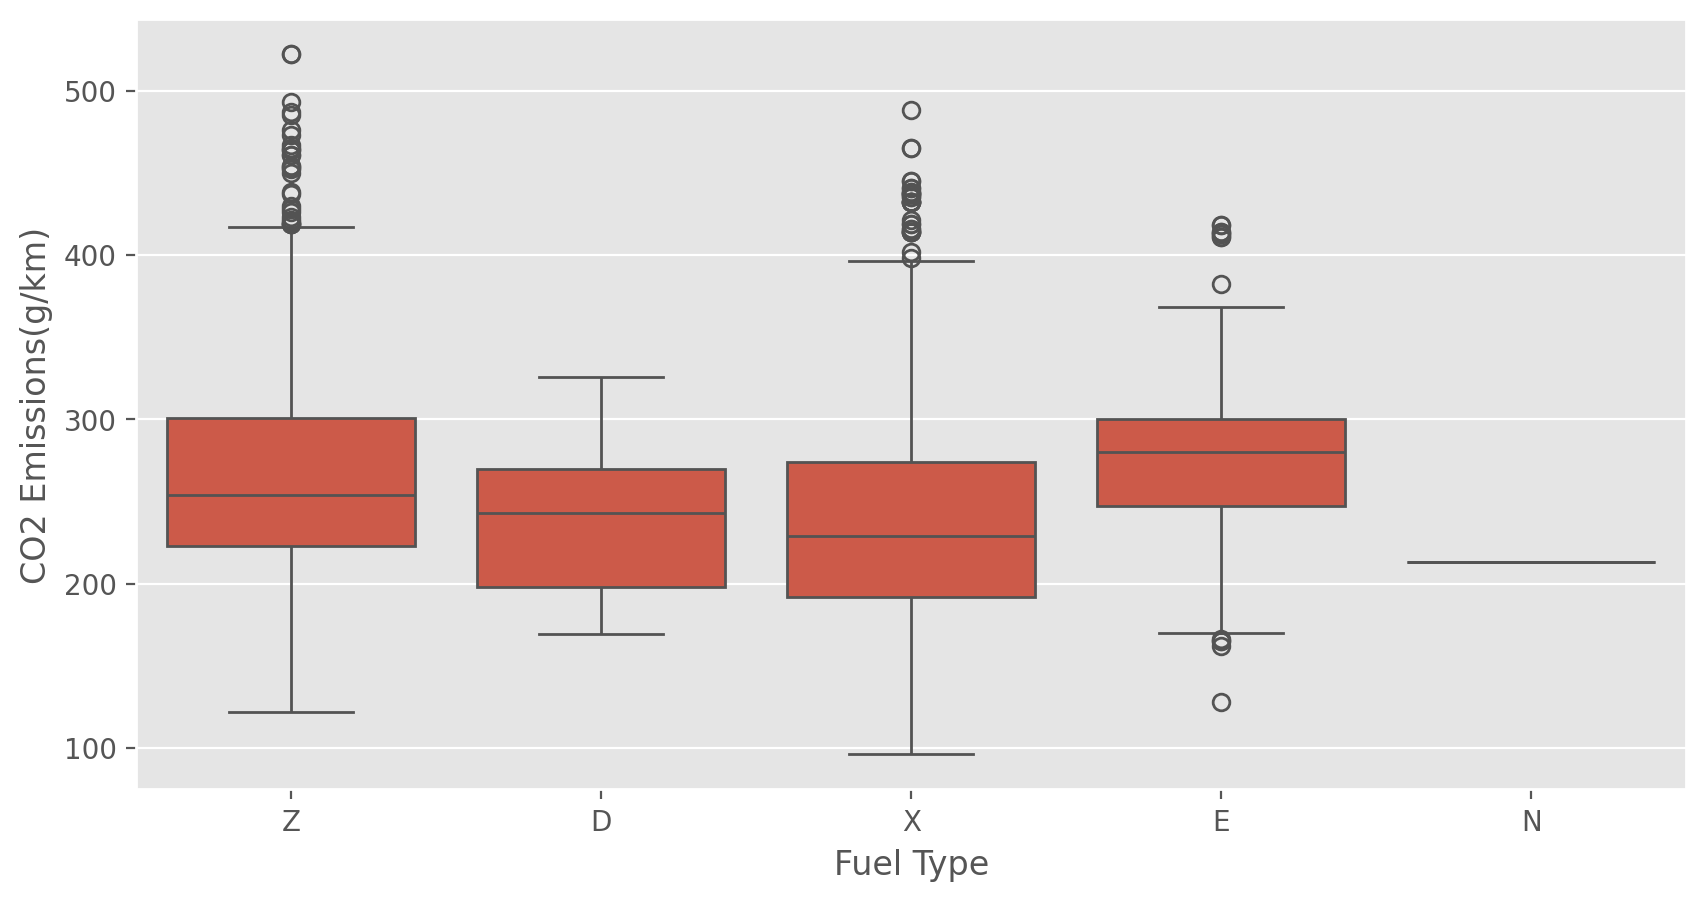

In [18]:
# checking carbon emission wtr fuel type - using boxplot
plt.figure(figsize = (10,5), dpi = 200)
sns.boxplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = data)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

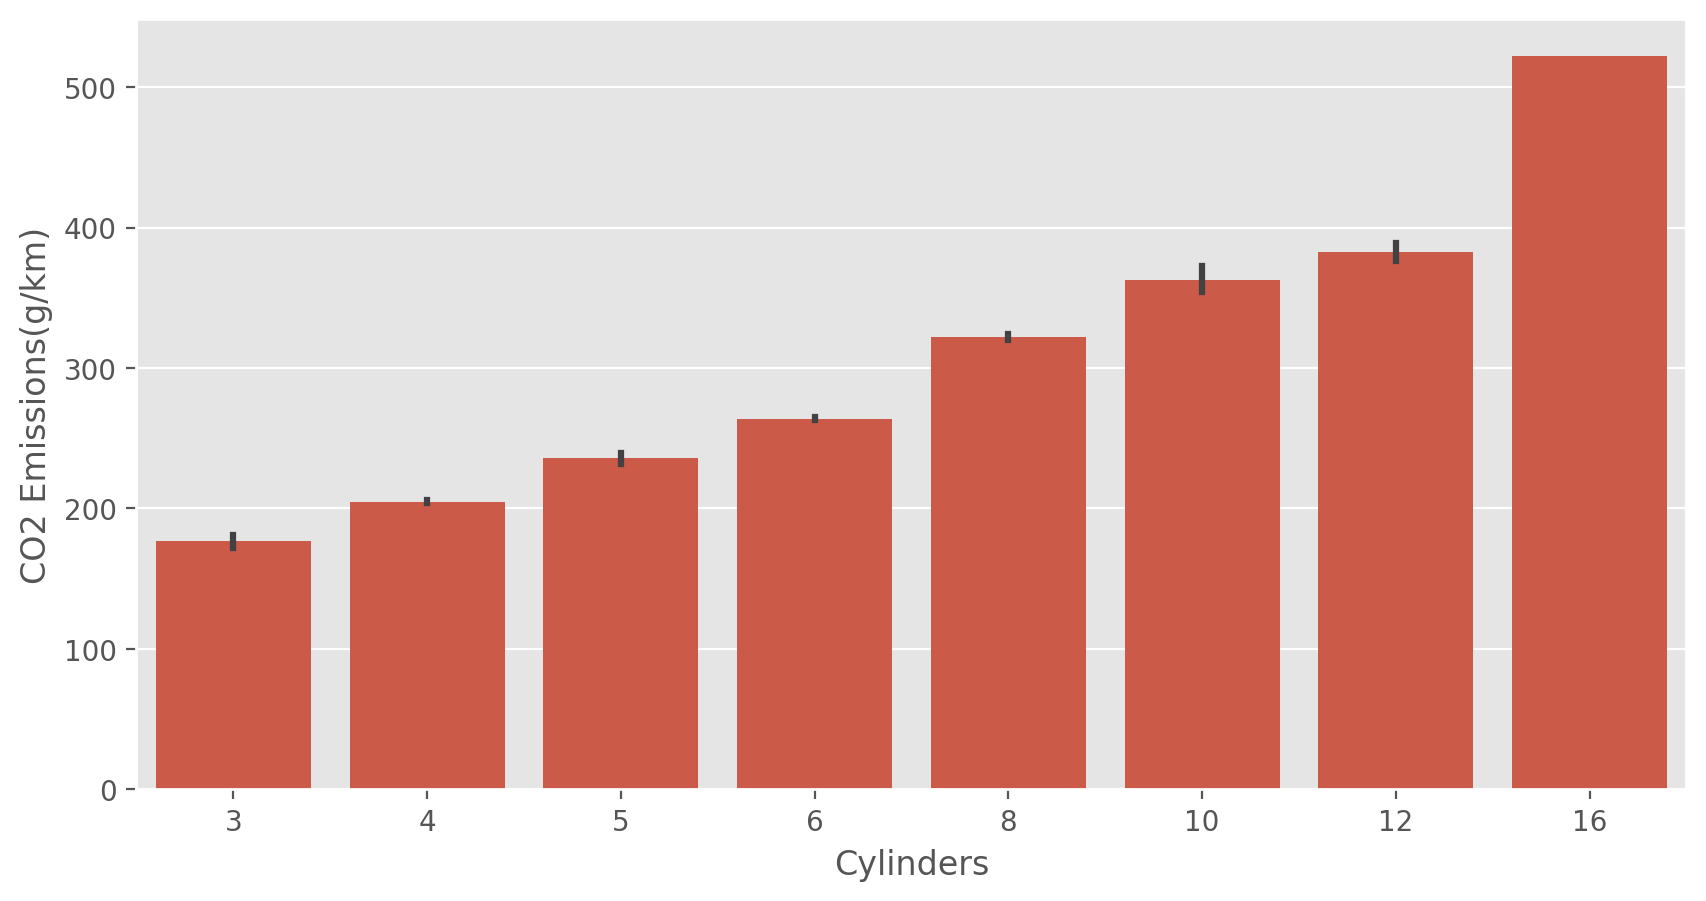

In [19]:
plt.figure( figsize = (10,5), dpi = 200)
sns.barplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = data)

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

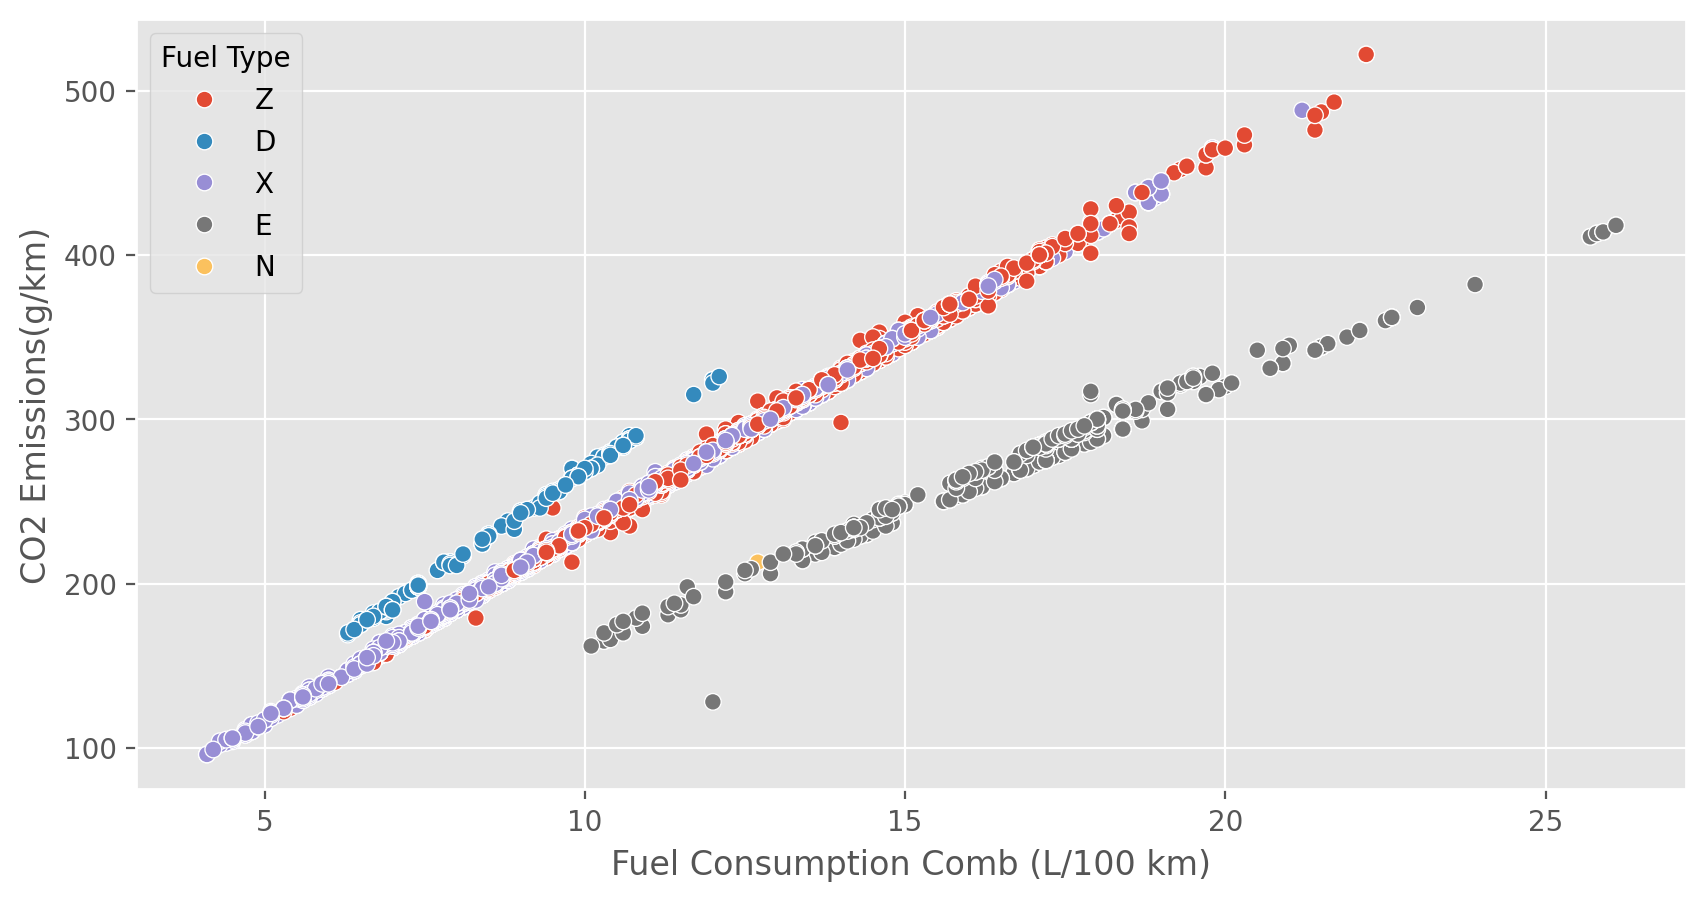

In [20]:
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)',hue = 'Fuel Type', data =  data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

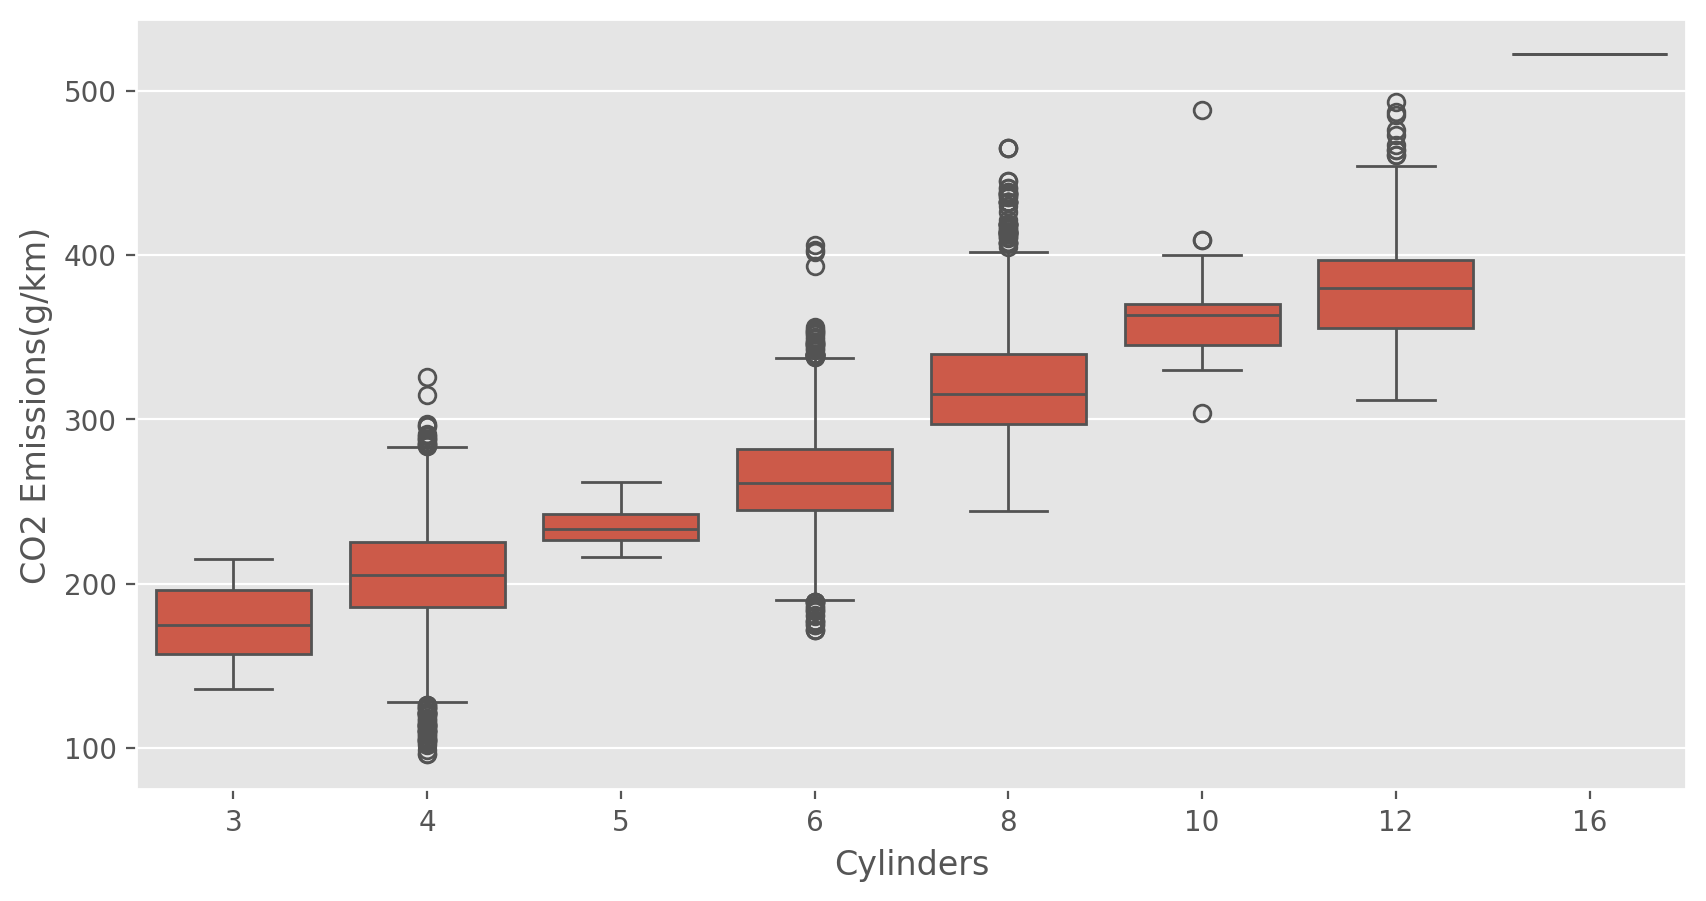

In [24]:
plt.figure( figsize = (10,5), dpi = 200)
sns.boxplot( x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = data )

# ------------------------------------------------
### Modeling 

In [26]:
cols = ['Vehicle Class', 'Transmission', 'Fuel Type', 'Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]

In [27]:
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,4,2.0,8.5
1,COMPACT,M6,Z,4,2.4,9.6
2,COMPACT,AV7,Z,4,1.5,5.9
3,SUV - SMALL,AS6,Z,6,3.5,11.1
4,SUV - SMALL,AS6,Z,6,3.5,10.6
5,MID-SIZE,AS6,Z,6,3.5,10.0
6,MID-SIZE,AS6,Z,6,3.5,10.1
7,MID-SIZE,AS6,Z,6,3.7,11.1
8,MID-SIZE,M6,Z,6,3.7,11.6
9,COMPACT,AS5,Z,4,2.4,9.2


In [28]:
Y.head(10)

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [29]:
print("Independent Feature Set Shape : ",X.shape)
print('Dependent Feature Set Shape : ',Y.shape)

Independent Feature Set Shape :  (6282, 6)
Dependent Feature Set Shape :  (6282, 1)


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X[cols] = scaler.fit_transform(X[cols])
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,4,0.146667,0.200000
1,COMPACT,M6,Z,4,0.200000,0.250000
2,COMPACT,AV7,Z,4,0.080000,0.081818
3,SUV - SMALL,AS6,Z,6,0.346667,0.318182
4,SUV - SMALL,AS6,Z,6,0.346667,0.295455
5,MID-SIZE,AS6,Z,6,0.346667,0.268182
6,MID-SIZE,AS6,Z,6,0.346667,0.272727
7,MID-SIZE,AS6,Z,6,0.373333,0.318182
8,MID-SIZE,M6,Z,6,0.373333,0.340909
9,COMPACT,AS5,Z,4,0.200000,0.231818


In [31]:
# Dealing with Categorical values

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
cols = ['Vehicle Class', 'Transmission', 'Fuel Type']
X[cols] = ordinal.fit_transform(X[cols])
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,4,0.146667,0.200000
1,0.0,25.0,4.0,4,0.200000,0.250000
2,0.0,22.0,4.0,4,0.080000,0.081818
3,11.0,15.0,4.0,6,0.346667,0.318182
4,11.0,15.0,4.0,6,0.346667,0.295455
5,2.0,15.0,4.0,6,0.346667,0.268182
6,2.0,15.0,4.0,6,0.346667,0.272727
7,2.0,15.0,4.0,6,0.373333,0.318182
8,2.0,25.0,4.0,6,0.373333,0.340909
9,0.0,14.0,4.0,4,0.200000,0.231818


In [32]:
# Splitting the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [33]:
print('Traning Data Shape : ', X_train.shape)
print('Traing Labels Shape : ', Y_train.shape)
print('Test Data Shape :', X_test.shape)
print('Test Labels Shape : ', Y_test.shape)

Traning Data Shape :  (4711, 6)
Traing Labels Shape :  (4711, 1)
Test Data Shape : (1571, 6)
Test Labels Shape :  (1571, 1)


## RandomForest
RandomForestRegressor(ForestRegressor)>      RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None
     , min_samples_split=2  min_samples_leaf=1  min_weight_fraction_leaf=0.0, max_features=1.0
       max_leaf_nodes=None, min_impurity_decrease=0.0  bootstrap=True oob_score=False, n_jobs=None
       random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, max_depth=3, max_features=3)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, max_features=3, n_estimators=10)

In [35]:
print("Training set score : ", rf_regressor.score(X_train, Y_train))
print("Testing set score  : ", rf_regressor.score(X_test, Y_test))

Training set score :  0.8990290358645017
Testing set score  :  0.8957332253092788


## Hyperparameter Tuning

In [36]:
 from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [37]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [38]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor, param_grid = search_params, scoring = ['r2'], cv=5, refit = 'r2', verbose=3)#cv means cross validation
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.904) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.902) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.905) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.904) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.912) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.890) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.905) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.910) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.915) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.905) total t

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 6, 8, 10],
                         'max_features': [4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=3)

In [39]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 50}

In [40]:
grid_search.best_score_

0.9962223072003535

In [41]:
best_model = grid_search.best_estimator_
best_model # from this model we can predict 

RandomForestRegressor(max_depth=10, max_features=4, n_estimators=50)

In [57]:
df = pd.DataFrame(randomized_search.cv_results_).sort_values('mean_test_r2', ascending=False)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
9,0.652371,0.010543,0.026462,0.001193,40,6,10,"{'n_estimators': 40, 'max_features': 6, 'max_d...",0.995396,0.996472,0.995974,0.997418,0.997394,0.996531,0.000792,1
14,0.142162,0.004907,0.012923,0.001476,10,6,8,"{'n_estimators': 10, 'max_features': 6, 'max_d...",0.994612,0.996265,0.997264,0.996983,0.996941,0.996413,0.000959,2
3,0.323217,0.024923,0.018513,0.000765,30,5,8,"{'n_estimators': 30, 'max_features': 5, 'max_d...",0.995007,0.996221,0.995733,0.997086,0.997242,0.996258,0.000836,3
4,0.228260,0.011224,0.015429,0.001356,20,5,8,"{'n_estimators': 20, 'max_features': 5, 'max_d...",0.994613,0.995878,0.994830,0.997052,0.996919,0.995859,0.001016,4
8,0.143932,0.007336,0.012624,0.001825,10,5,10,"{'n_estimators': 10, 'max_features': 5, 'max_d...",0.992233,0.996434,0.995334,0.996895,0.996133,0.995406,0.001666,5


In [58]:
df.to_csv("Grid_Search_result.csv")

## RandomizedSearchCV
   - When you are handle alots of features

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor() 

In [43]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = regressor, param_distributions = search_params,
                                       scoring = ['r2'], cv=5, refit='r2', n_iter = 15, verbose=3)
randomized_search.fit(X_train, Y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=8, max_features=4, n_estimators=20; r2: (test=0.992) total time=   0.1s
[CV 2/5] END max_depth=8, max_features=4, n_estimators=20; r2: (test=0.995) total time=   0.1s
[CV 3/5] END max_depth=8, max_features=4, n_estimators=20; r2: (test=0.993) total time=   0.1s
[CV 4/5] END max_depth=8, max_features=4, n_estimators=20; r2: (test=0.996) total time=   0.1s
[CV 5/5] END max_depth=8, max_features=4, n_estimators=20; r2: (test=0.996) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=50; r2: (test=0.902) total time=   0.2s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=50; r2: (test=0.918) total time=   0.2s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=50; r2: (test=0.911) total time=   0.2s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=50; r2: (test=0.914) total time=   0.2s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=50; r2: (test=0.918) total ti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [3, 4, 6, 8, 10],
                                        'max_features': [4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='r2', scoring=['r2'], verbose=3)

In [47]:
randomized_search.best_params_

{'n_estimators': 40, 'max_features': 6, 'max_depth': 10}

In [48]:
randomized_search.best_score_

0.9965306147853251

In [50]:
best_model = randomized_search.best_estimator_
best_model

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=40)

In [55]:
df2 = pd.DataFrame(randomized_search.cv_results_).sort_values('mean_test_r2', ascending=False)
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
9,0.652371,0.010543,0.026462,0.001193,40,6,10,"{'n_estimators': 40, 'max_features': 6, 'max_d...",0.995396,0.996472,0.995974,0.997418,0.997394,0.996531,0.000792,1
14,0.142162,0.004907,0.012923,0.001476,10,6,8,"{'n_estimators': 10, 'max_features': 6, 'max_d...",0.994612,0.996265,0.997264,0.996983,0.996941,0.996413,0.000959,2
3,0.323217,0.024923,0.018513,0.000765,30,5,8,"{'n_estimators': 30, 'max_features': 5, 'max_d...",0.995007,0.996221,0.995733,0.997086,0.997242,0.996258,0.000836,3
4,0.228260,0.011224,0.015429,0.001356,20,5,8,"{'n_estimators': 20, 'max_features': 5, 'max_d...",0.994613,0.995878,0.994830,0.997052,0.996919,0.995859,0.001016,4
8,0.143932,0.007336,0.012624,0.001825,10,5,10,"{'n_estimators': 10, 'max_features': 5, 'max_d...",0.992233,0.996434,0.995334,0.996895,0.996133,0.995406,0.001666,5


In [56]:
df2.to_csv("Randomized_Search_result.csv")